In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
single_image=X_train[0]

In [38]:
single_image.shape

(28, 28)

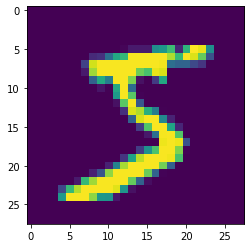

In [39]:
plt.imshow(single_image)

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
y_train.shape

(60000,)

In [43]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [44]:
y_cat_train.shape

(60000, 10)

In [45]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [46]:
single_image.max()

255

In [47]:
single_image.min()

0

In [48]:
X_train=X_train/255
X_test=X_test/255

In [49]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

#OUTPUT LAYER
#multi class classification
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop=EarlyStopping(monitor="val_loss",patience=1)

In [55]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0389 - val_accuracy: 0.9875


In [59]:
metrics=pd.DataFrame(model.history.history)


In [60]:
metrics




,loss,accuracy,val_loss,val_accuracy
0,0.050852,0.984567,0.042459,0.9866
1,0.032896,0.989433,0.038261,0.9882
2,0.023615,0.992367,0.038937,0.9875


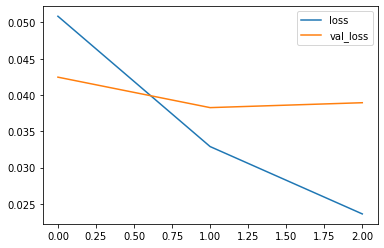

In [58]:
metrics[["loss","val_loss"]].plot()

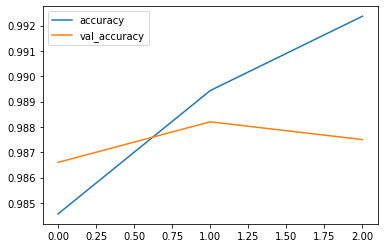

In [61]:
metrics[["accuracy","val_accuracy"]].plot()

In [62]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.03893725946545601, 0.987500011920929]

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [67]:
pred1=np.argmax(model.predict(X_test), axis=-1)

In [70]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.97      1.00      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [71]:
print(confusion_matrix(y_test,pred1))

[[ 977    0    0    1    0    0    1    0    1    0]
 [   0 1131    1    2    0    0    1    0    0    0]
 [   3    1 1020    2    1    0    0    4    1    0]
 [   0    0    1 1007    0    0    0    0    2    0]
 [   0    0    1    0  979    0    0    0    0    2]
 [   1    1    1   10    0  876    3    0    0    0]
 [   6    2    0    1    2    3  943    0    1    0]
 [   1    2    6    1    0    0    0 1015    1    2]
 [   5    0    4    2    3    0    0    5  950    5]
 [   2    2    0    3   20    1    0    4    0  977]]


In [80]:
my_number=X_test[0]

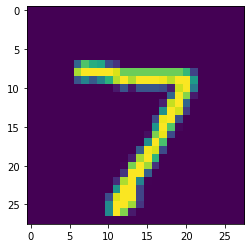

In [81]:
plt.imshow(my_number.reshape(28,28))

#plt.imshow(my_number)

In [75]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)